# Conditions and Setting

## Condition
The association between gender, condition and decision was significant.  Female participants tended to make positive choices 25% more frequently when there was limited choice, then when choice was extensive. Condition did not seem to have an effect on decision for males.

In [1]:
# libraries
%matplotlib inline

import os
import sys
import inspect
sys.path.append("../src")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from shared import directories
from shared import filenames
from shared import variables
from analysis import trivariate
sys.path.append(directories.ANALYSIS_DIR)
sys.path.append(directories.UTILITIES_DIR)

import bivariate, independence, visual
import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
df = pd.read_csv(os.path.join(directories.INTERIM_DATA_DIR,
                              filenames.INTERIM_FILENAME),
                 encoding="Latin-1", low_memory=False)
df_columns = pd.read_csv(os.path.join(directories.EXTERNAL_DATA_DIR,
                              filenames.COLUMNS_FILENAME),
                 encoding="Latin-1", low_memory=False)
df_labels = pd.read_csv(os.path.join(directories.EXTERNAL_DATA_DIR,
                              filenames.LABELS_FILENAME),
                 encoding="Latin-1", low_memory=False)
df_columns = df_columns[(df_columns['sel']=='Y') & (df_columns['Predictor_Decision']=='Y')]
df_males = df[df['gender']=='Male']
df_females = df[df['gender']=='Female']
df_yes = df[df['dec']=='Yes']
df_yes_males = df[(df['dec']=='Yes')& (df['gender']=='Male')]
df_yes_females = df[(df['dec']=='Yes')& (df['gender']=='Female')]

## Analysis

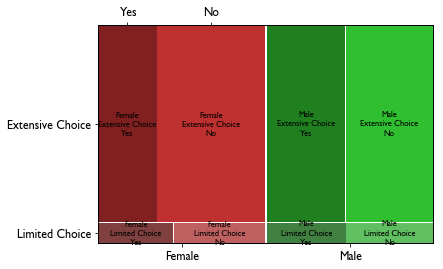

gender           Female                            Male               
condtn Extensive Choice Limited Choice Extensive Choice Limited Choice
dec                                                                   
No             0.649609       0.550234         0.528655       0.526075
Yes            0.350391       0.449766         0.471345       0.473925

gender           Female                            Male                    All
condtn Extensive Choice Limited Choice Extensive Choice Limited Choice        
dec                                                                           
No                41892           3527            33706           3450   82575
Yes               22596           2883            30052           3108   58639
All               64488           6410            63758           6558  141214

,x,y,z,p-Value,Cramer's V,Strength,Result
0,gender,condtn,dec,0.0,0.085568,Very Weak Association,Significant


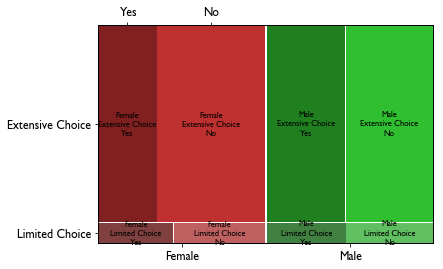

In [4]:
i, d, p = trivariate.analysis(df, x='gender', y='condtn', z='dec')
p
d['pct']
d['count']
i